# Milestone 1

# Introduction

Nama  : Maulana Azmi Izzuddin

Batch : FTDS-013

# Objective

Buatlah model Classification untuk memprediksi default_payment_next_month menggunakan dataset yang sudah kalian simpan.

Conceptual Problems

Jawab pertanyaan berikut:

- Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
- Apakah fungsi dari pruning pada Tree model?
- Bagaimana cara memilih K yang optimal pada KNN?
- Jelaskan apa yang kalian ketahui tentang Cross Validation!
- Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 1 dalam konsep Supervised Learning sebagai berikut:

- Mampu memperoleh data menggunakan BigQuery
- Mampu memahami konsep supervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning
- Mampu mengimplementasikan supervised learning dengan data yang diberikan
- Mampu memilih model dengan cross validation score
- Mampu melakukan model tuning dengan GridSearch
- Mampu melakukan evaluasi model
- Memprediksi default_payment_next_month pada data inference

# Dataset

## Query

```txt
SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default` 
LIMIT 25974;
```

tahun lahir 1998 batch 13

## Dataset Info :

Dataset ini berisikan data terkait credit card setiap client secara anonymous yang diambil pada bigquey public data. Data ini berisikan:
- id = anonymized ID of each client
- limit balance = amount of givent credit in USD
- sex = gender 1= male 2 female
- education level = 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown
- marital status = 1=married, 2=single, 3=others
- age = umur dalam tahun
- pay_0 = Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- pay_2 sama seperti pay_0 Agustus 2005
- pay_3 sama seperti pay_0 July 2005
- pay_4 sama seperti pay_0 june 2005
- pay_5 sama seperti pay_0 may 2005
- pay_6 sama seperti pay_0 April 2005
- bill_amt_1 sampai bill_amt_6 adalah amount of bill statement August 2005 - April 2005
- pay_amt_1 sampai pay_amt_6 adalah amount of previous payment Agustus 2005-April 2005
- default_payment_next_month 1 = yes 0 = no.


# Import Library

Import library-library yang akan diperlukan:

In [3]:
import numpy as np #untuk operasi array
import pandas as pd #mannipulasi dataframe
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting
from sklearn import preprocessing #preprocessing data sebelum implementasi ML
from sklearn import model_selection #digunakan untuk split train-test set
from sklearn.ensemble import ExtraTreesClassifier # Untuk melihat feature importances.
from sklearn.linear_model import LogisticRegression #digunakan untuk modelling logistic regression
from sklearn.svm import SVC #digunakan untuk modelling svc
from sklearn.tree import DecisionTreeClassifier #digunakan untuk modelling decision tree
from sklearn.ensemble import RandomForestClassifier #digunakan untuk modelling random forest
from sklearn.neighbors import KNeighborsClassifier #digunakan untuk modelling knn
from sklearn.naive_bayes import GaussianNB #digunakan untuk modelling naive bayes gaussian
from sklearn.ensemble import AdaBoostClassifier #digunakan untuk modelling Adaboost classifier
from sklearn import metrics #Untuk metrics evaluasi model
from feature_engine import outliers #untuk deteksi Outliers
from sklearn.compose import ColumnTransformer #digunakan untuk membuat columntransformer
from sklearn.pipeline import Pipeline #digunakan untuk membuat pipeline
import time #digunakan untuk menghitung waktu proses


# Data Loading

Loading Data:

In [4]:
# Load Data
df = pd.read_csv('h8dsft_P1M1_maulana_azmi_izzuddin.csv')

In [164]:
# Melihat 5 data pertama
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,...,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,...,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,...,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,...,19837,19855,20151,1367,1606,692,709,721,692,0


In [165]:
# Melihat 5 data terakhir
df.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,...,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,...,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,...,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,...,0,0,6753,2920,0,0,0,6753,0,1
2964,20000,2,1,2,24,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [166]:
# Melihat shape data
df.shape

(2965, 24)

Pada data ini terdapat 24 column dan 2965 entry data.

# Exploratory Data Analysis (EDA)

## Explore Data

In [167]:
# Melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

Terlihat pada data ini seluruhnya bertipe data int64. Namun terdapat beberapa column yang seharusnya berkategori pada kategori nominal dan kategori ordinal.

In [168]:
#forloop untuk melihat unique values dan jumlahnya pada tiap column
for col in df:
    unique_values = np.unique(df[col]) #melihat unique values apa saja
    number_values = len(unique_values) #melihat jumlah unique values
    if number_values <= 11: # jika data type object maka print hingga detail apa saja unique values
        print("Jumlah unique values pada {} : {} yaitu {}".format(col,number_values,unique_values))
    else:
        print("Jumlah unique values pada {} : {}".format(col,number_values))

Jumlah unique values pada limit_balance : 59
Jumlah unique values pada sex : 2 yaitu [1 2]
Jumlah unique values pada education_level : 7 yaitu [0 1 2 3 4 5 6]
Jumlah unique values pada marital_status : 4 yaitu [0 1 2 3]
Jumlah unique values pada age : 49
Jumlah unique values pada pay_0 : 11 yaitu [-2 -1  0  1  2  3  4  5  6  7  8]
Jumlah unique values pada pay_2 : 10 yaitu [-2 -1  0  1  2  3  4  5  6  7]
Jumlah unique values pada pay_3 : 9 yaitu [-2 -1  0  2  3  4  5  6  7]
Jumlah unique values pada pay_4 : 10 yaitu [-2 -1  0  2  3  4  5  6  7  8]
Jumlah unique values pada pay_5 : 9 yaitu [-2 -1  0  2  3  4  5  6  7]
Jumlah unique values pada pay_6 : 8 yaitu [-2 -1  0  2  3  4  6  7]
Jumlah unique values pada bill_amt_1 : 2643
Jumlah unique values pada bill_amt_2 : 2592
Jumlah unique values pada bill_amt_3 : 2549
Jumlah unique values pada bill_amt_4 : 2504
Jumlah unique values pada bill_amt_5 : 2482
Jumlah unique values pada bill_amt_6 : 2461
Jumlah unique values pada pay_amt_1 : 1415


Features:

- Column numerical adlaah limit_balance, age, bill_amt_1 sampai bill_amt_6, pay_amt_1 sampai pay_amt_6.
- Column categorical adalah sex, education level, marital status, pay0 sampai pay6.

Naumn karena pada data ini sudah dalam bentuk numeric semua maka pada saat data preprocessing akan dilakukan scaling saja.

In [169]:
# Variabel berisikan nama column berdasarkan tipe

# Numerical
col_num_name = ['limit_balance','age','bill_amt_1','bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6','pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5','pay_amt_6']
# Categorical 
col_cat_name = ['sex', 'education_level', 'marital_status','pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

## Visualization Data

Melihat data target balance:

<AxesSubplot:xlabel='default_payment_next_month', ylabel='count'>

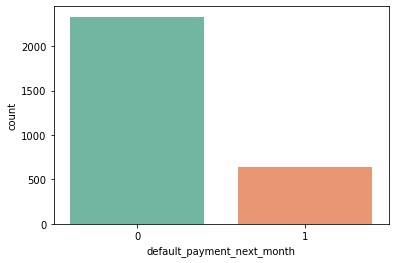

In [170]:
# Melihat balance dari data target (default_payment_next_month)
sns.countplot(x= 'default_payment_next_month', data=df, palette=('Set2'))

In [5]:
df['default_payment_next_month'].value_counts()

0    2330
1     635
Name: default_payment_next_month, dtype: int64

In [6]:
635/(635+2330)

0.21416526138279932

df

Terlihat pada target pada label default payment next month, bahwa pada data yang terlabel akan telat melakukan pembayaran bulan depan (1 / Yes) lebih sedikit dibandingkan dengan yang tidak telat bayar bulan depan (0 / No). Sehingga data target disini cukup tidak balance.

Melihat distribusi limit balance dari client:

<AxesSubplot:xlabel='limit_balance', ylabel='Count'>

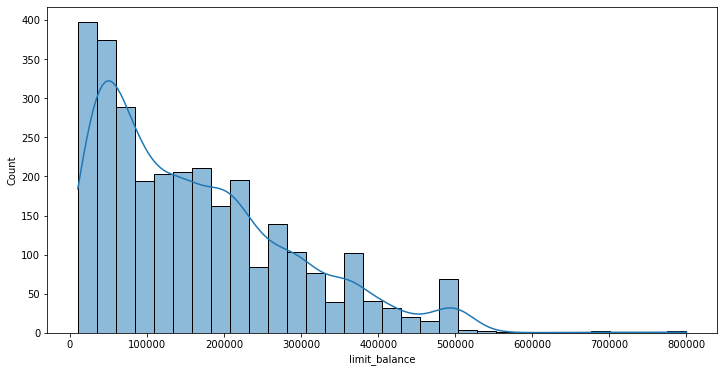

In [171]:
plt.figure(figsize=(12,6))
sns.histplot(x = 'limit_balance',data=df,kde=True)

Terlihat bahwa distribusi limit balance pada data credit ini bertipe distribusi positive skew karena terdapat banyak limit balance yang tinggi namun frekuensinya kecil. Selain itu mayoritas limit balance berada pada di bawah 100000.

Melihat distribusi age atau umur dari setiap client:

<AxesSubplot:xlabel='age', ylabel='Count'>

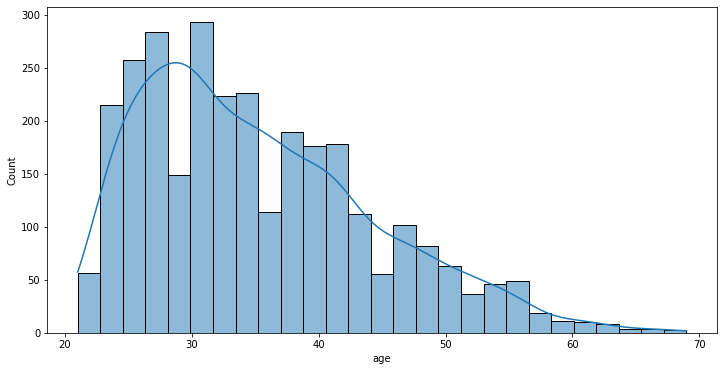

In [172]:
plt.figure(figsize=(12,6))
sns.histplot(x = 'age',data=df,kde=True)

Terlihat pada data ini distribusi umur bertipe distribusi positive skew, dimana mayoritas client berada pada rentan umur 25 hingga 35 tahun.

Melihat persebaran data education level:

<AxesSubplot:xlabel='education_level', ylabel='Count'>

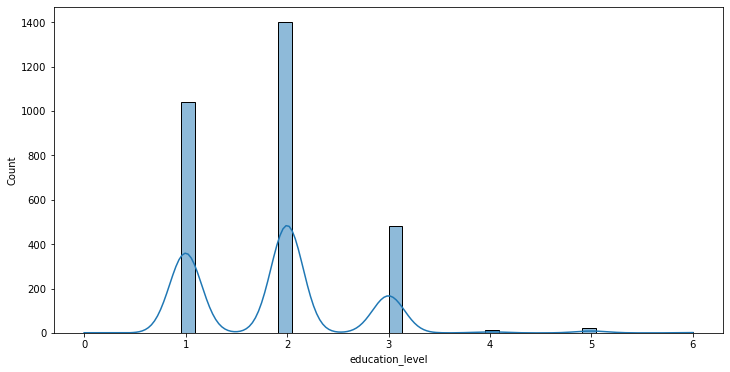

In [173]:
plt.figure(figsize=(12,6))
sns.histplot(x = 'education_level',data=df,kde=True)

Berdasarkan pada distribusi level educationnya mayoritas client berada apda education level 2, yaitu tingkat pendidikan university.

Selanjutnya ingin melihat persebaran repayment status terhadap default payment nya.

<AxesSubplot:xlabel='pay_6', ylabel='count'>

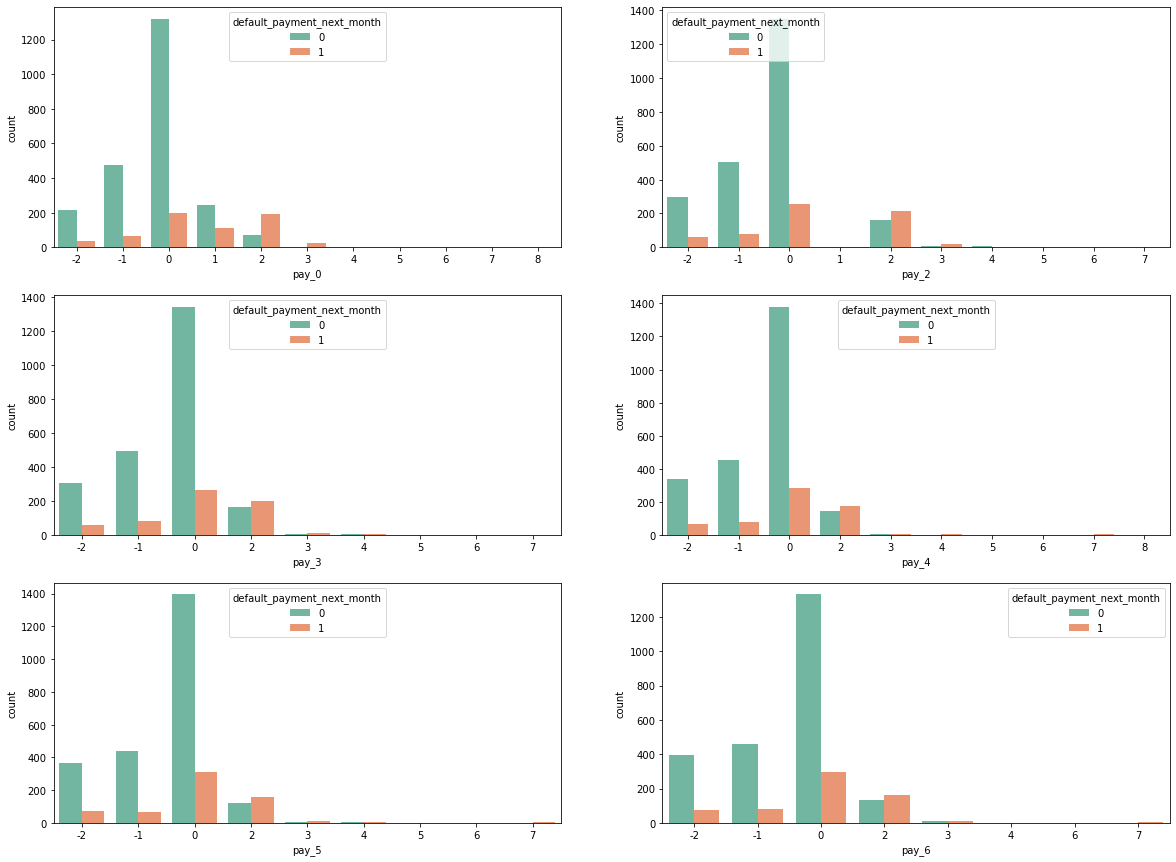

In [174]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.countplot(x= 'pay_0',hue = 'default_payment_next_month', data=df, palette=('Set2'))
plt.subplot(3,2,2)
sns.countplot(x= 'pay_2',hue = 'default_payment_next_month', data=df, palette=('Set2'))
plt.subplot(3,2,3)
sns.countplot(x= 'pay_3',hue = 'default_payment_next_month', data=df, palette=('Set2'))
plt.subplot(3,2,4)
sns.countplot(x= 'pay_4',hue = 'default_payment_next_month', data=df, palette=('Set2'))
plt.subplot(3,2,5)
sns.countplot(x= 'pay_5',hue = 'default_payment_next_month', data=df, palette=('Set2'))
plt.subplot(3,2,6)
sns.countplot(x= 'pay_6',hue = 'default_payment_next_month', data=df, palette=('Set2'))

Berdasarkan count plot pada repayment status pada bulan April 2005 hingga bulan September 2005 memiliki tipe atau persebaran yang sama pada tiap tahunnya. Dimana client yang default payment nya 0 atau akan membayar tepat waktu secara history repayment status jarang atau sedikit yang telat melakukan pembayaran. Sedangkan client yang default payment nya 1 atau diprediksi telat bayar secara history repayment statusnya paling banyak melakukan telat pembayaran.

Selain itu mayoritas client yang berkategori default payment 0 atau tidak telat bayar berada pada repayment status 0, dimana mereka selalu tepat dalam membayar credit walaupun terdapat sedikit yang telat bayar walaupun hanya 1 bulan. Selain itu juga ada beberapa yang bayar secukupnya.

<AxesSubplot:xlabel='marital_status', ylabel='count'>

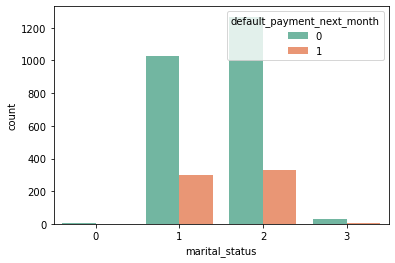

In [175]:
sns.countplot(x= 'marital_status',hue = 'default_payment_next_month', data=df, palette=('Set2'))

Berdasarkan marital statusnya, mayoritas client berstatus single atau belum menikah.

<AxesSubplot:xlabel='sex', ylabel='count'>

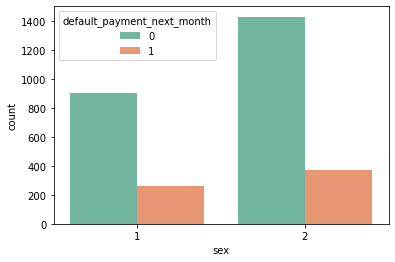

In [176]:
sns.countplot(x= 'sex',hue = 'default_payment_next_month', data=df, palette=('Set2'))

Berdasarkan gendernya, client female (2) lebih banyak dibandingkan client male (1).

<AxesSubplot:xlabel='pay_6', ylabel='bill_amt_6'>

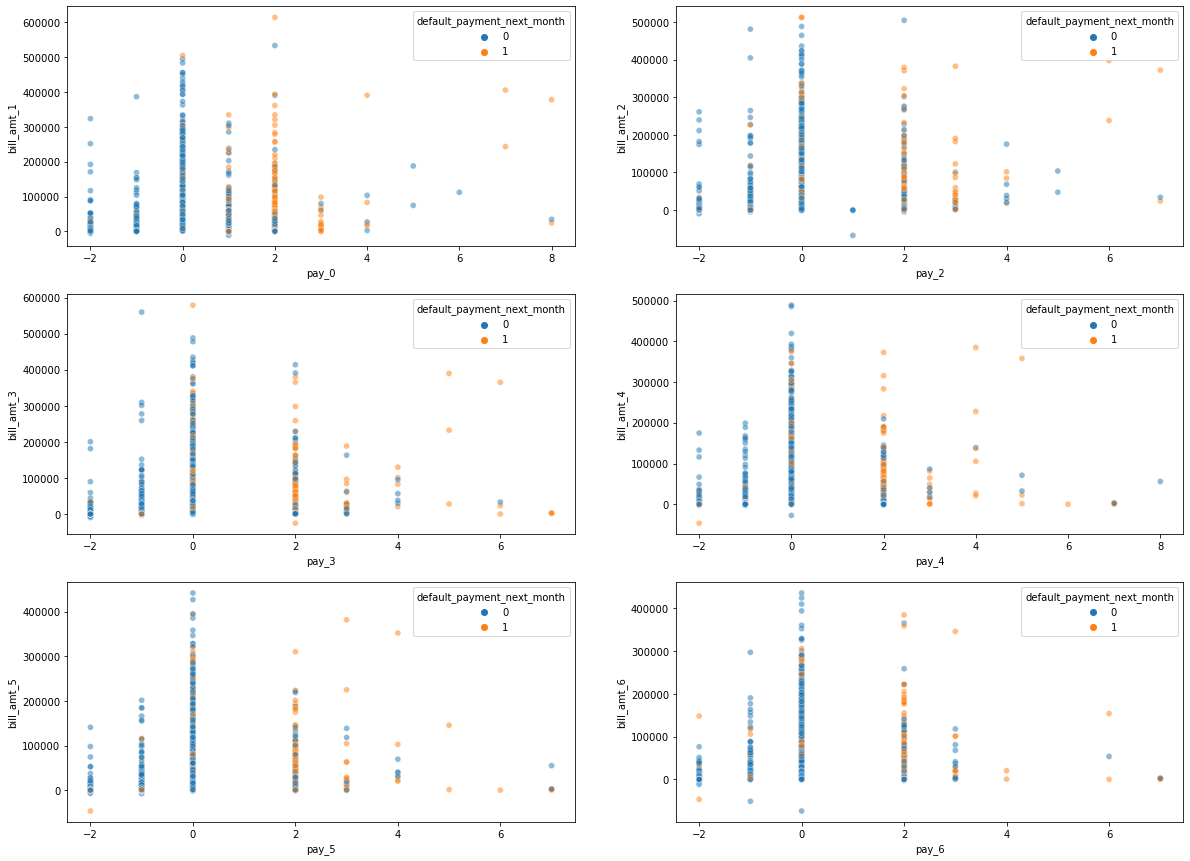

In [177]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.scatterplot(x='pay_0',y= 'bill_amt_1',data=df, hue = 'default_payment_next_month',alpha=0.5)
plt.subplot(3,2,2)
sns.scatterplot(x='pay_2',y= 'bill_amt_2',data=df, hue = 'default_payment_next_month',alpha=0.5)
plt.subplot(3,2,3)
sns.scatterplot(x='pay_3',y= 'bill_amt_3',data=df, hue = 'default_payment_next_month',alpha=0.5)
plt.subplot(3,2,4)
sns.scatterplot(x='pay_4',y= 'bill_amt_4',data=df, hue = 'default_payment_next_month',alpha=0.5)
plt.subplot(3,2,5)
sns.scatterplot(x='pay_5',y= 'bill_amt_5',data=df, hue = 'default_payment_next_month',alpha=0.5)
plt.subplot(3,2,6)
sns.scatterplot(x='pay_6',y= 'bill_amt_6',data=df, hue = 'default_payment_next_month',alpha=0.5)

Selanjutnya berdasarkan hubungan antara repayment status dan bill amount pada setiap bulannya, dilihat bahwa client yang berkategori yes pada default payment atau telat bayar dengan warna orange (1) ini paling banyak tersebar pada repayment status diatas angka 0 semua. Sehingga terliaht bahwa pada client yang berkategori telat melakukan pembayaran bulan depan ini paling banyak repayment status berada pada di atas angka 2. Sehingga ini menandakan bahwa client-client ini memang secara history sering melakukan telat pembayaran.

<AxesSubplot:xlabel='bill_amt_6', ylabel='pay_amt_6'>

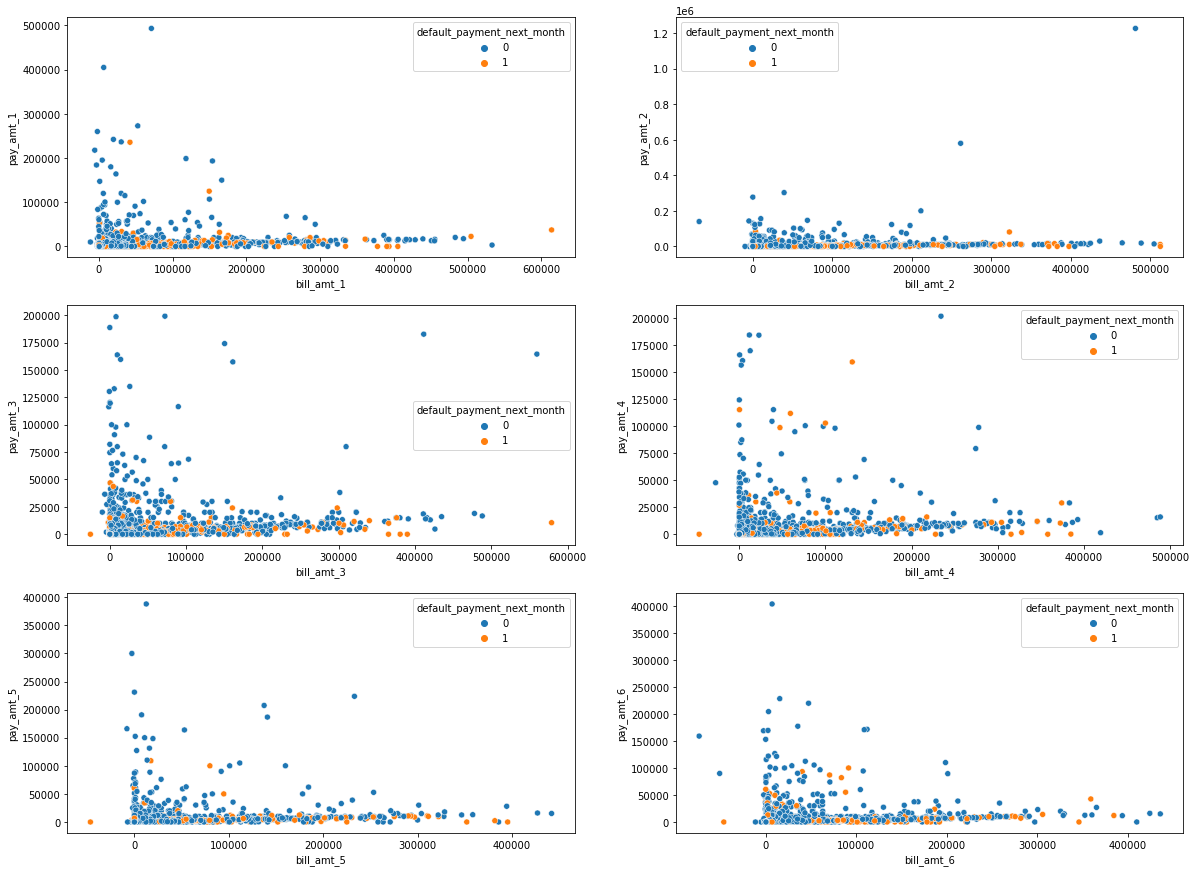

In [178]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.scatterplot(x='bill_amt_1',y= 'pay_amt_1',data=df, hue = 'default_payment_next_month')
plt.subplot(3,2,2)
sns.scatterplot(x='bill_amt_2',y= 'pay_amt_2',data=df, hue = 'default_payment_next_month')
plt.subplot(3,2,3)
sns.scatterplot(x='bill_amt_3',y= 'pay_amt_3',data=df, hue = 'default_payment_next_month')
plt.subplot(3,2,4)
sns.scatterplot(x='bill_amt_4',y= 'pay_amt_4',data=df, hue = 'default_payment_next_month')
plt.subplot(3,2,5)
sns.scatterplot(x='bill_amt_5',y= 'pay_amt_5',data=df, hue = 'default_payment_next_month')
plt.subplot(3,2,6)
sns.scatterplot(x='bill_amt_6',y= 'pay_amt_6',data=df, hue = 'default_payment_next_month')

Berdasarkan pada persebaran data antar jumlah bill dengan jumlah yang dibayar pada setiap clientnya, bahwa rata-rata client melakukan pembayaran di bawah 25.000. Selain itu juga terlihat, client berkategori 1 pada default payment mayoritas atau hampir semuanya melakukan pembayaran setiap bulannya di bawah 25000.

### Coorelation

Pada bagian ini akan melakukan analisa correlation antar feature dan juga terhadap target:

<AxesSubplot:>

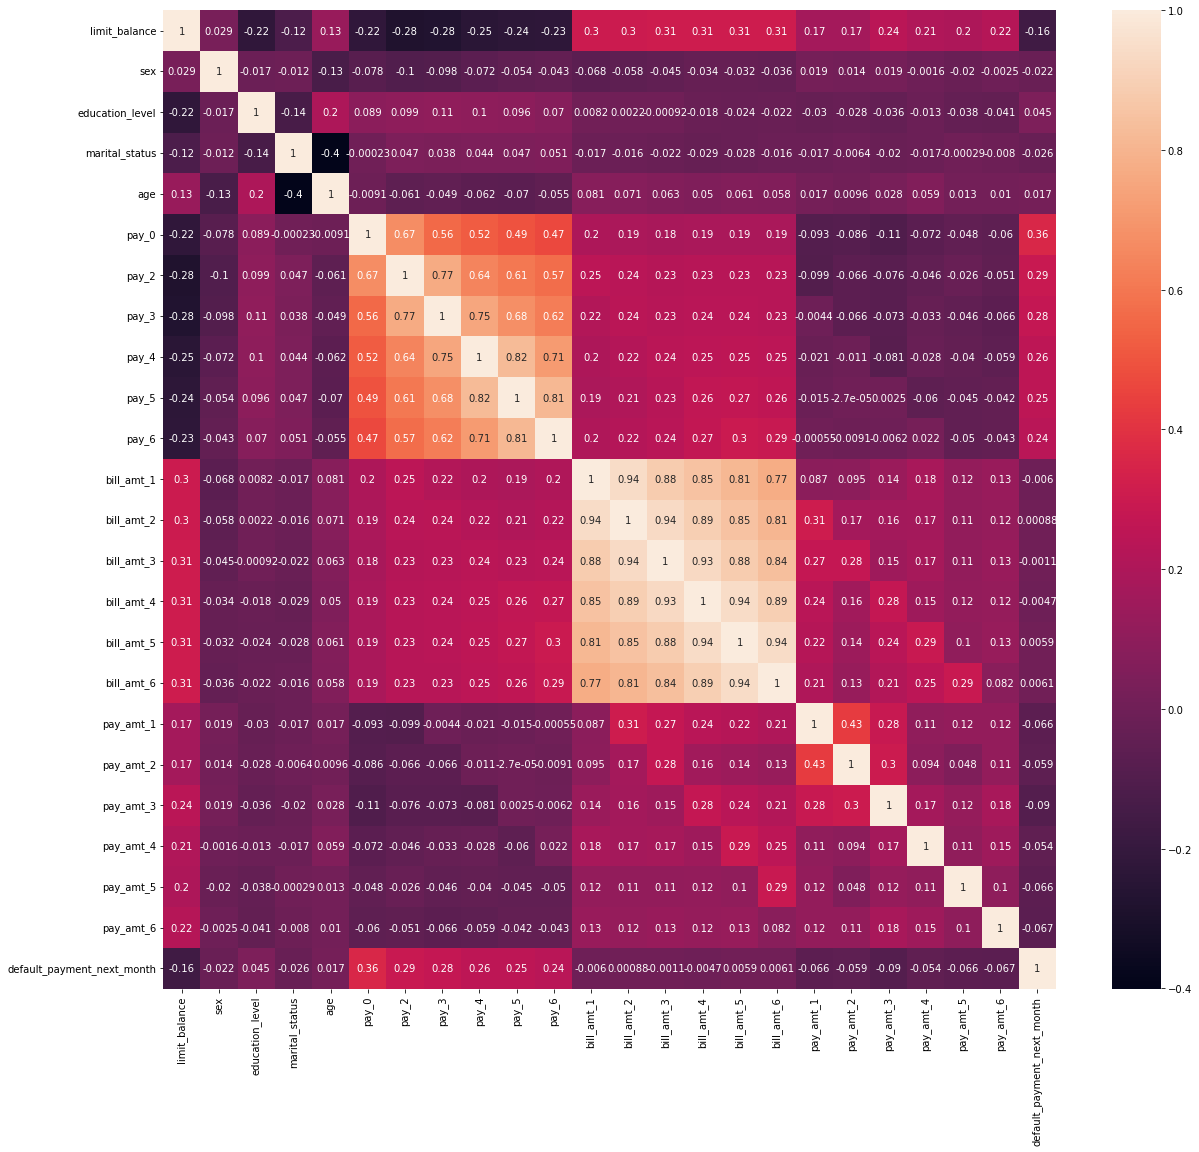

In [179]:
#Melihat correlation feature-target dan feature-feature
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot= True)

Dapat dilihat pada heatmap diatas yang dimana berisikan correlation antar feature dan juga feature terhadap target. 

`feature-target`

Jika dilihat berdasarkan correlation feature terhadap target, feature pay_0 hingga pay_6 lah yang memiliki correlation yang tinggi, lalu diikuti oleh education level, selanjutnya age. Selain itu limit balance memiliki correlation negative dengan target dimana ini menandakan bahwa correlationnya berbanding terbalik.

`feature-feature`

- Jika dilihat antar feature dapat dilihat bahwa pada column pay_0 hingga pay_6 antar feature satu sama lainnya memiliki correlation yang tinggi. Sehingga disini dapat menyebabkan redundant features karena sebenarnya sudah dapat terwakilkan dengan salah satu features saja.
- Selain itu, hal ini juga terjadi pada bill_amt_1 hingga bill_amt_6 dimana masing-masing satu sama lainnya memiliki correaltion yang tinggi.
- pada pay_amt_1 dan pay_amt_2 juga memiliki correlation yang cukup tinggi.



Sehingga insight-insight ini akan menjadi pertimbangan dalam feature selection yang dimana akan di bahas pada data preprocessing.

# Data Preporcessing

## Handling Missing Values

In [180]:
# Cek missing value

df.isnull().any()

limit_balance                 False
sex                           False
education_level               False
marital_status                False
age                           False
pay_0                         False
pay_2                         False
pay_3                         False
pay_4                         False
pay_5                         False
pay_6                         False
bill_amt_1                    False
bill_amt_2                    False
bill_amt_3                    False
bill_amt_4                    False
bill_amt_5                    False
bill_amt_6                    False
pay_amt_1                     False
pay_amt_2                     False
pay_amt_3                     False
pay_amt_4                     False
pay_amt_5                     False
pay_amt_6                     False
default_payment_next_month    False
dtype: bool

Terlihat pada data ini tidak ditemukan missing value dengan ditujukan value boolean False pada setiap columnnya.

## Splitting Data Train-Test

In [181]:
# Splitting data menjadi X(features),y(target) 
X,y = df.drop('default_payment_next_month',axis=1), df['default_payment_next_month']

In [182]:
# Melihat 5 data pertama X
X.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000,1,1,2,39,0,0,0,0,0,...,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000
1,110000,2,1,2,29,0,0,0,0,0,...,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000
2,270000,1,1,2,36,0,0,0,2,0,...,46512,40335,37165,22156,10076,4018,14,2051,2000,0
3,130000,1,1,1,45,0,0,0,0,0,...,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291
4,50000,1,1,2,24,0,0,0,0,0,...,22110,19837,19855,20151,1367,1606,692,709,721,692


In [183]:
# Melihat data target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: default_payment_next_month, dtype: int64

In [184]:
# Split data X (features) dan y(target) menjadi data train-test set

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size= 0.2, random_state = 98)

print('X Train Size : ', X_train.shape)
print('X Test Size  : ', X_test.shape)

print('y Train Size : ', y_train.shape)
print('y Test Size  : ', y_test.shape)

X Train Size :  (2372, 23)
X Test Size  :  (593, 23)
y Train Size :  (2372,)
y Test Size  :  (593,)


In [185]:
# Setelah itu dilakukan reset_index karena sebelumnya saat pembagian train-test secara acak

X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

## Handling Outliers

Melakukan pengecekan data outlier dengan menggunakan boxplot pada tiap column bertipe numerical, dimana handling outliers hanya dilakukan pada data train:

Pengecekan Outliers pada column :  limit_balance


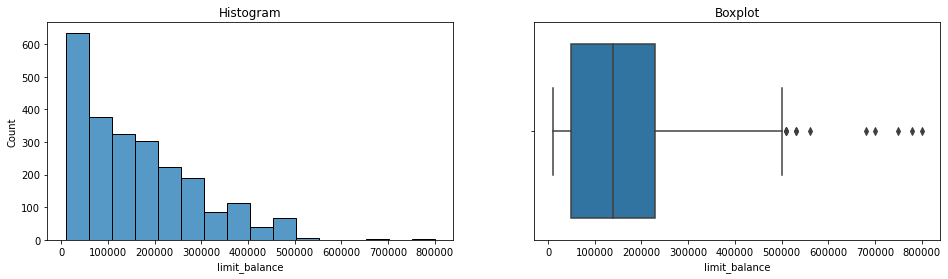

Pengecekan Outliers pada column :  age


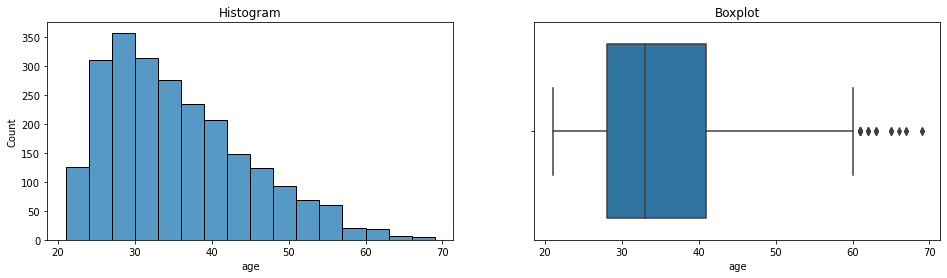

Pengecekan Outliers pada column :  bill_amt_1


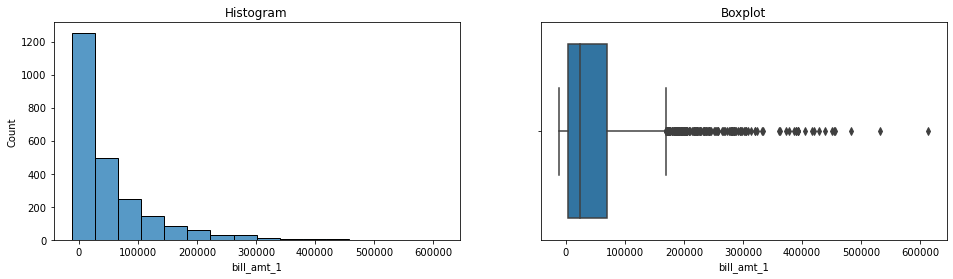

Pengecekan Outliers pada column :  bill_amt_2


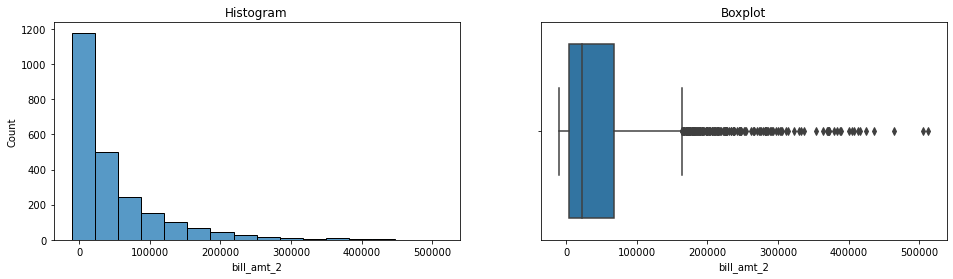

Pengecekan Outliers pada column :  bill_amt_3


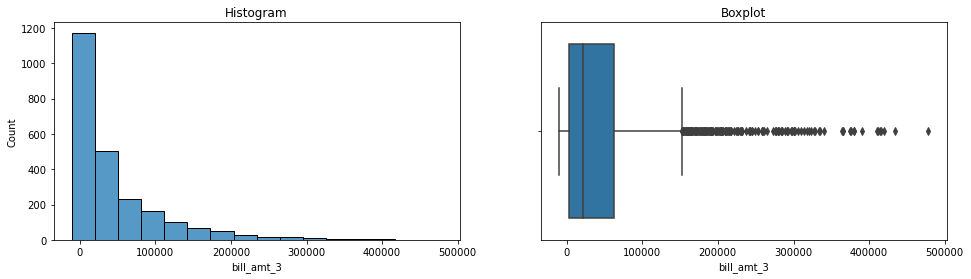

Pengecekan Outliers pada column :  bill_amt_4


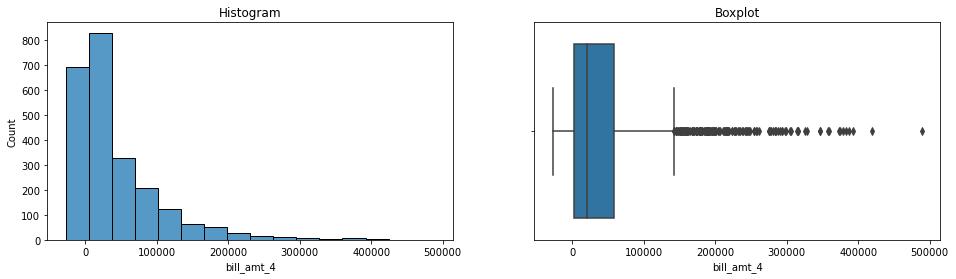

Pengecekan Outliers pada column :  bill_amt_5


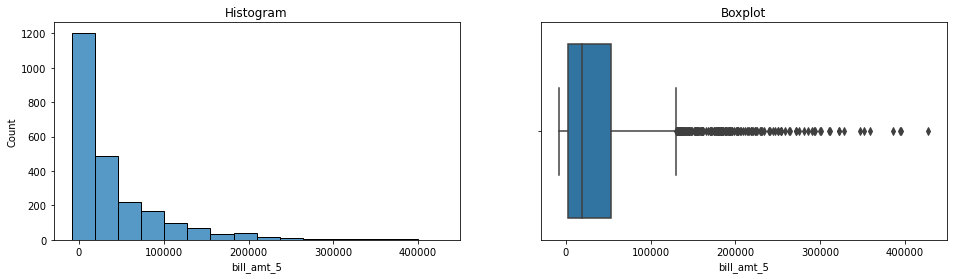

Pengecekan Outliers pada column :  bill_amt_6


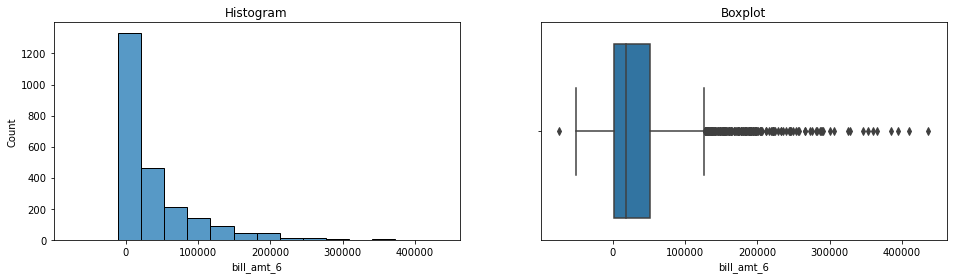

Pengecekan Outliers pada column :  pay_amt_1


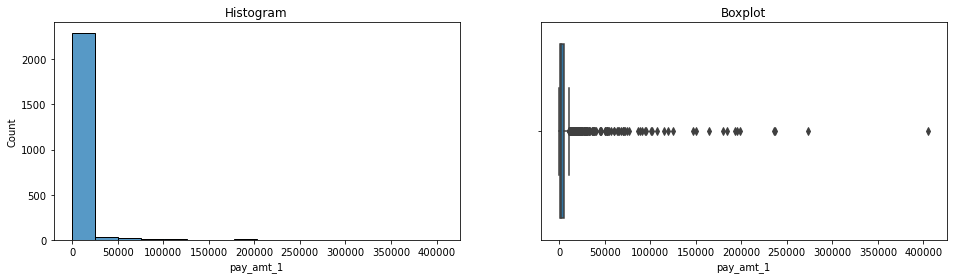

Pengecekan Outliers pada column :  pay_amt_2


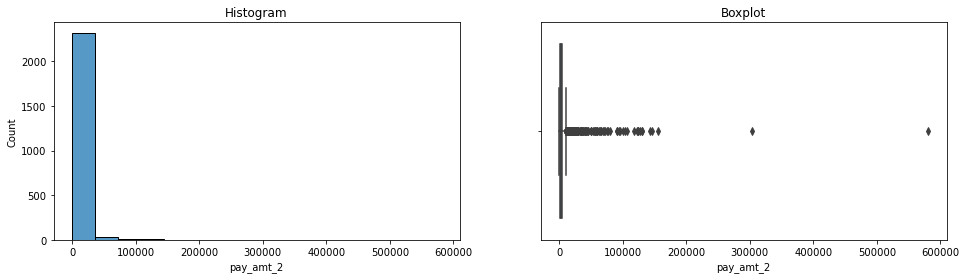

Pengecekan Outliers pada column :  pay_amt_3


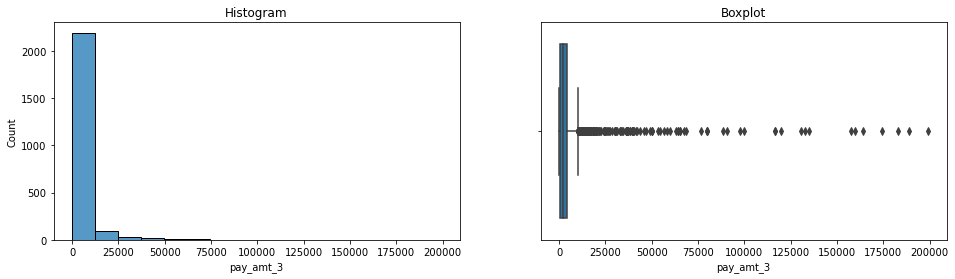

Pengecekan Outliers pada column :  pay_amt_4


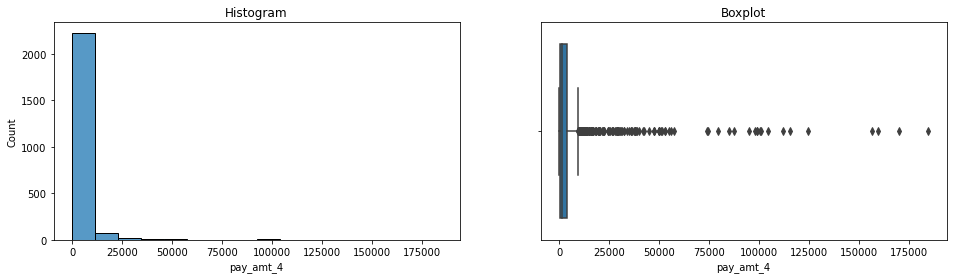

Pengecekan Outliers pada column :  pay_amt_5


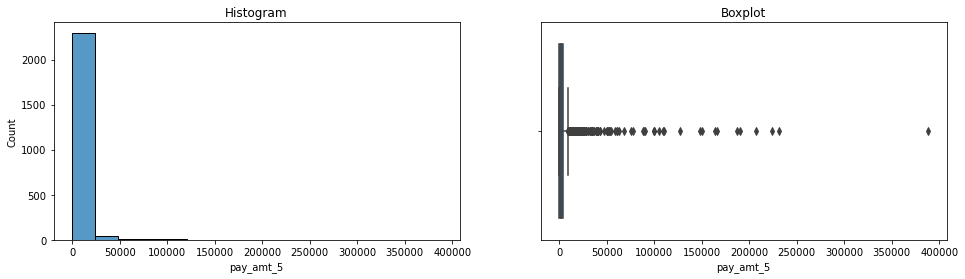

Pengecekan Outliers pada column :  pay_amt_6


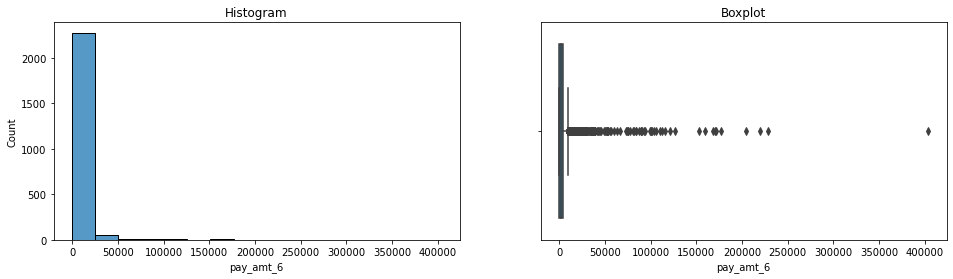

In [186]:
# Menggunakan For-loop untuk plotting histogram dan boxplot tiap column

for col in col_num_name:
    print('Pengecekan Outliers pada column : ',col)
    plt.figure(figsize=(16,4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(x = col,data=X_train,bins=16)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x = col,data=X_train)
    plt.title('Boxplot')
    plt.show()


Terlihat berdasarkan pada plotting histogram bahwa persebaran data untuk column numerical semuanya bertipe distrubsi positive skew atau right skew. Sedangkan jika dilihat pada boxplot dapat dilihat bahwa pada setiap column numerical terdapat outliersnya.

Handling Outliers :

Pada handling outliers ini menggunakan teknik capping dengan bantuan library winsorizer. Selain itu metode capping yang dilakukan dengan IQR karena semua distribusi bertipe positive skew.

In [187]:
# Handling outliers dengan metode capping, IQR dengan bantuan library Winsorizer
windsoriser = outliers.Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=col_num_name)

windsoriser.fit(X_train)
X_train_clean = windsoriser.transform(X_train)

In [188]:
print('X Train setelah handling outleir Size : ', X_train.shape)
print('y Train Size : ', y_train.shape)

X Train setelah handling outleir Size :  (2372, 23)
y Train Size :  (2372,)


Terlihat size masih sama dengan sebelumnya karena metode yang dilakukan adalah capping.

Selanjutnya mengecek histogram dan boxplot setelah handling outlier:

Setelah Handling Outliers pada column :  limit_balance


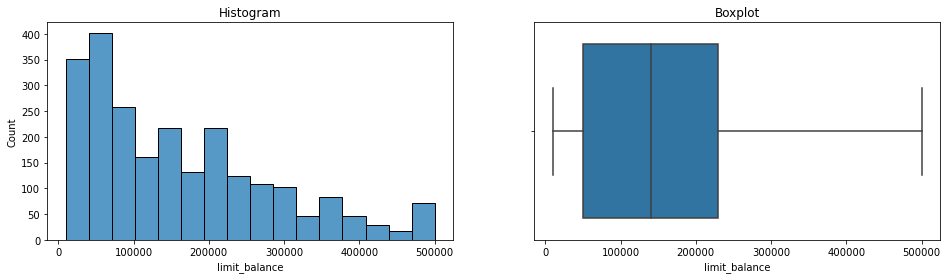

Setelah Handling Outliers pada column :  age


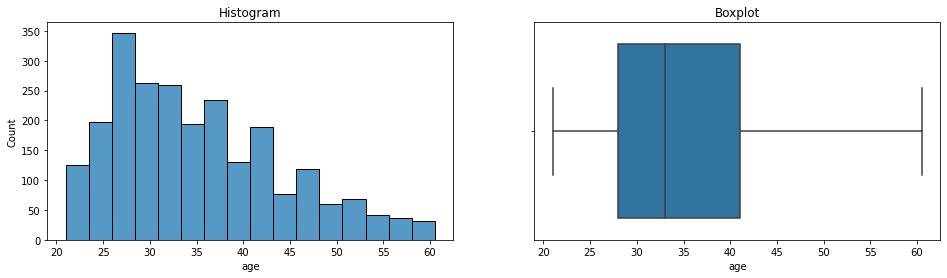

Setelah Handling Outliers pada column :  bill_amt_1


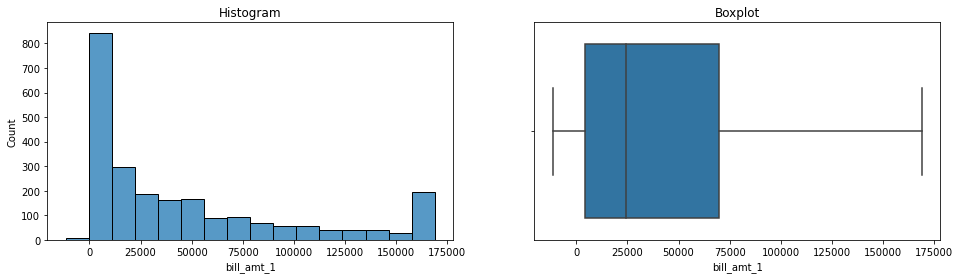

Setelah Handling Outliers pada column :  bill_amt_2


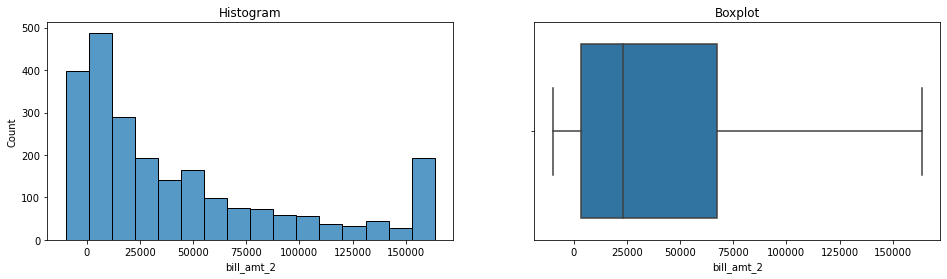

Setelah Handling Outliers pada column :  bill_amt_3


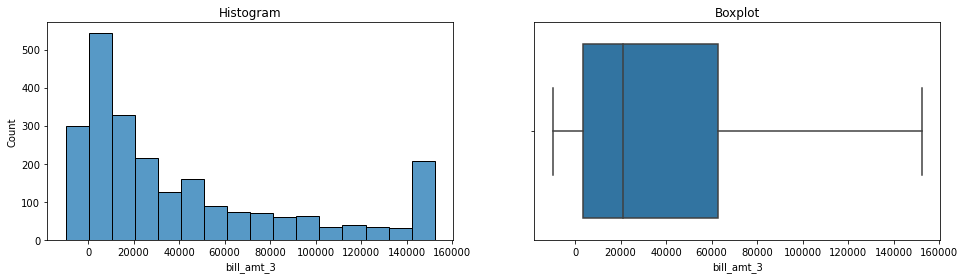

Setelah Handling Outliers pada column :  bill_amt_4


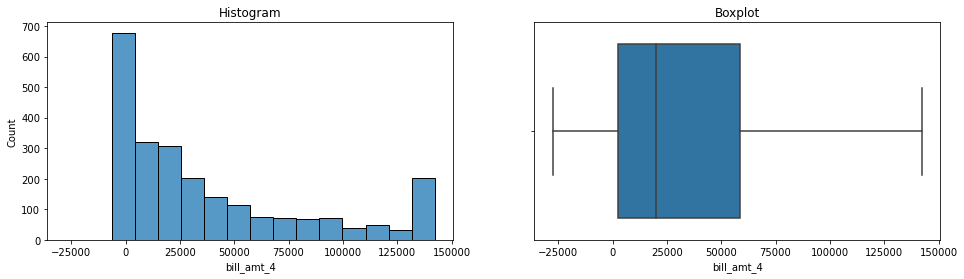

Setelah Handling Outliers pada column :  bill_amt_5


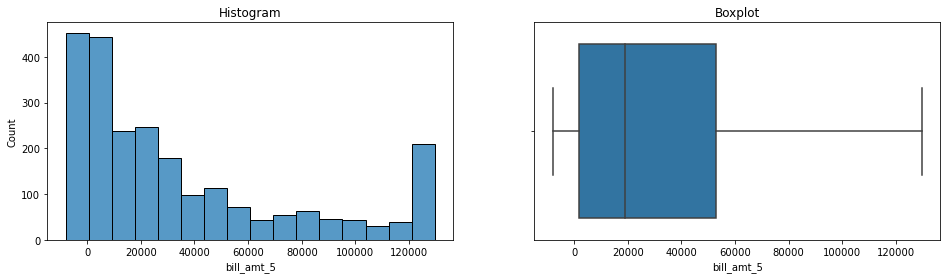

Setelah Handling Outliers pada column :  bill_amt_6


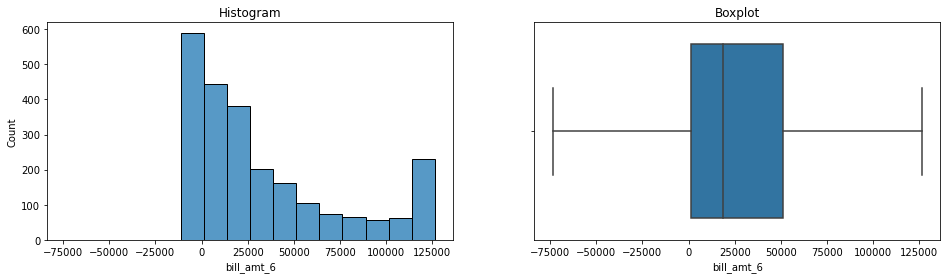

Setelah Handling Outliers pada column :  pay_amt_1


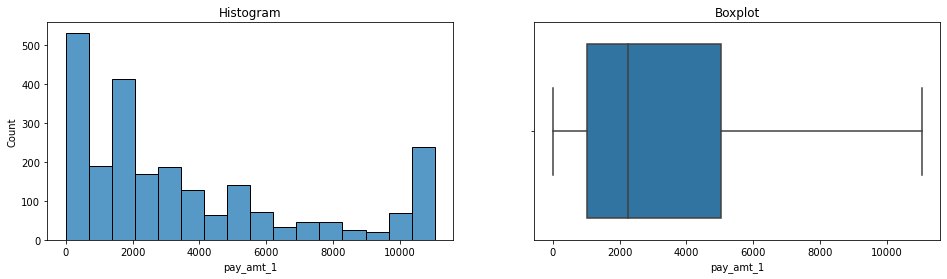

Setelah Handling Outliers pada column :  pay_amt_2


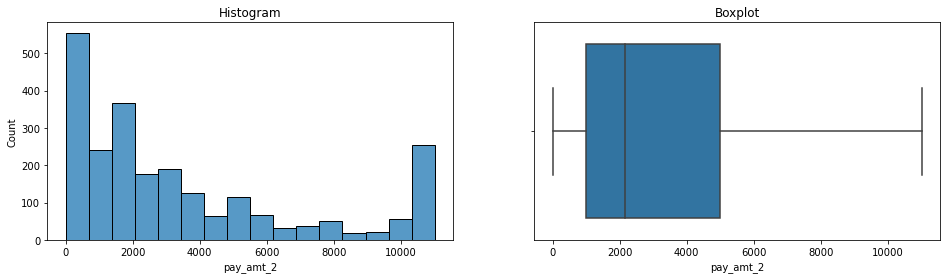

Setelah Handling Outliers pada column :  pay_amt_3


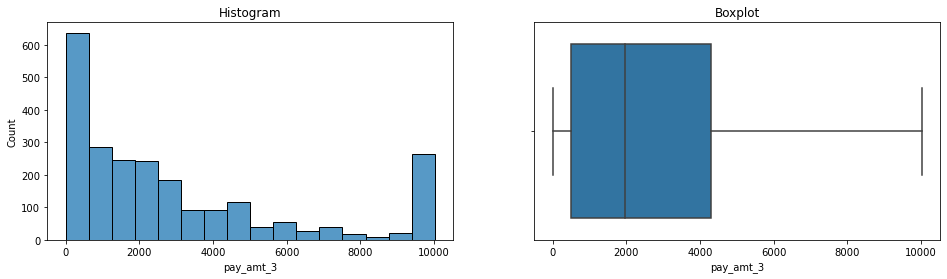

Setelah Handling Outliers pada column :  pay_amt_4


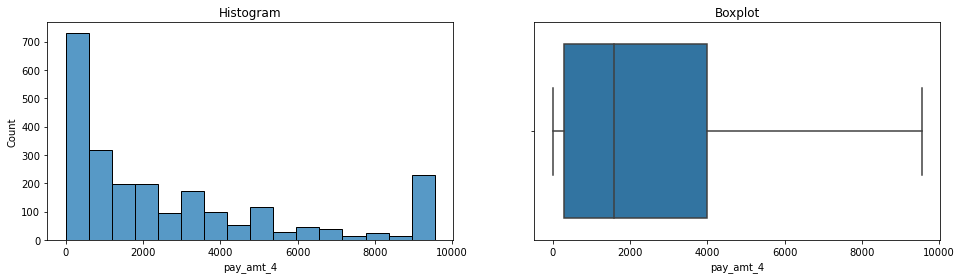

Setelah Handling Outliers pada column :  pay_amt_5


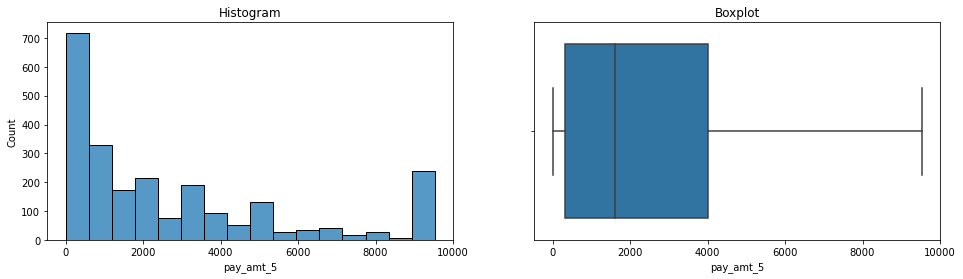

Setelah Handling Outliers pada column :  pay_amt_6


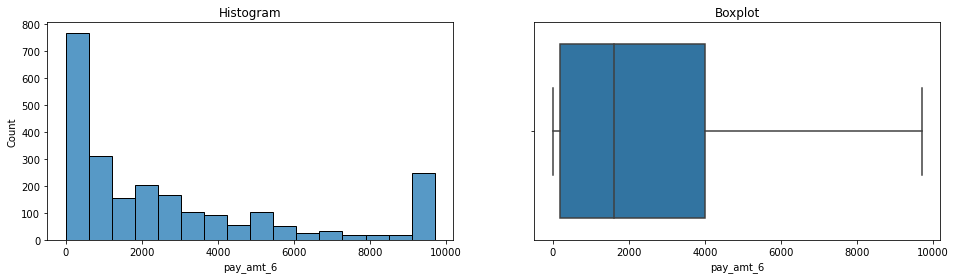

In [189]:
# Menggunakan For-loop untuk plotting histogram dan boxplot tiap column

for col in col_num_name:
    print('Setelah Handling Outliers pada column : ',col)
    plt.figure(figsize=(16,4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(x = col,data=X_train_clean,bins=16)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x = col,data=X_train_clean)
    plt.title('Boxplot')
    plt.show()

## Encoding Features (X)

Pada data ini yang didapat sudah dalam bentuk data type integer seluruhnya pada setiap column sehingga pada tahap encoding tidak dilakukan.

## Scaling Features (X)

Pada data ini akan dlikakuan scaling dengan menggunakan metode MinMax. Metode ini digunakan karena hampir seluruh data tidak terdistribusi normal.

Pada scaling ini akan menggunakan pipeline agar pada cross validation tidak terjadi kebocoran data karena fit dilakukan setelah train set dan validation set dilakukan split. Jika tidak, kemungkinan akan terjadi kebocoran data.

In [190]:
# Scaling_features

features_scaler = Pipeline([("minmax",preprocessing.MinMaxScaler())]) #defaulte minmax scaler di scaling pada range 0 hingga 1
features_scaler.fit(X_train_clean)

Pipeline(steps=[('minmax', MinMaxScaler())])

## Feature Importance 

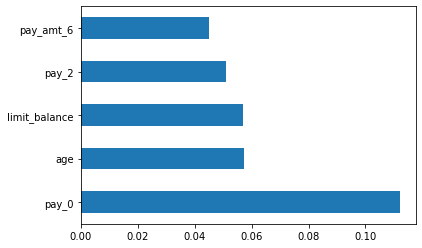

In [191]:
# Menghitung featture importance dengan menggunakan Extra trees classifier

model_fi = ExtraTreesClassifier() #model feature importance
model_fi.fit(X,y) # pada data X terhadap y dilakukan training (fit)
feat_importances = pd.Series(model_fi.feature_importances_, index=X.columns) # memasukan feature importance dengan index nama column pada data X (features)
feat_importances.nlargest(5).plot(kind='barh') # plot bar
plt.show()

Di dapat top 5 feature importance dari seluruh column terhadap target.Dimana feature yang paling penting dalam mempengaruhi target adalah pay_0 lalu diikuti oleh limit_balance, age, pay_2, dan pay_amt_6.

## Feature Selection

Feature Selection akan dilakukan berdasarkan insight yang telah didapat dari correlation heatmap dan juga feature importance yang sebelumnya telah dilakukan.

Berdasarkan Heatmap Correlation feature yang dipilih adalah:
- pay_0, karena berdasarkan feature-feature pay_0 hingga pay_6 memiliki correlation yang sangat tinggi antar satu sama lain sehingga dipilih salah satu dan juga karena pay_0 adalah repayment status terakhir dari data yang dimiliki yaitu pada bulan September 2005.
- education_level karena memiliki correlation yang cukup  tinggi dengan target.
- age karena memiliki correlation yang cukup tinggi.
- limit_balance karena memiliki correlation yang cukup tinggi namun berbanding terbalik (karena negatif)

Berdasarkan dari feature importance dengan Extra Tress Classifier:

Didapat bahwa Top 5 feature importance dari seluruh column terhadap target.Dimana feature yang paling penting dalam mempengaruhi target adalah pay_0 lalu diikuti oleh limit_balance, age, pay_2, dan pay_amt_6.

Sehingga disini feature yang akan dipilih adalah yang beririsan dengan metode heatmap correlation dan feature importance, yaitu: `pay_0`, `age`, dan `limit_balance`. 

In [192]:
# Feature Selection X_train

X_train_selection = X_train_clean[['pay_0','age','limit_balance']]

# Feature Selection X_test
X_test_selection = X_test[['pay_0','age','limit_balance']]

In [193]:
# Melihat shape dari train-test setelah feature selection:
print('X Train Size setelah feature selection : ', X_train_selection.shape)
print('X Test Size setelah feature selection  : ', X_test_selection.shape)

X Train Size setelah feature selection :  (2372, 3)
X Test Size setelah feature selection  :  (593, 3)


In [194]:
feature_selection_name = ['pay_0','age','limit_balance']

Membuat Column Transformers dengan nama variabel preprocess selection yang dimana disini akan digunakan pada pembuatan pipeline dan juga nantinya pada saat data inference.

In [195]:
preprocess_selection = ColumnTransformer(transformers=[("data",features_scaler,feature_selection_name)])

In [196]:
data_preprocess = preprocess_selection.fit(X_train_clean)

In [197]:
X_test_scaled = data_preprocess.transform(X_test)

# Model Definition

Pada kasus ini akan membuat model untuk mengklasifikasikan data client default_payment_next_month apakah client akan telat membayar bulan depan atau tidak.

Sehingga pada kasus ini akan menggunakan model classifier, seperti Logistic Regression, Suport Vector Machine (Classifier), Decision Tree, Random Forest, KNN, Gaussian Naive Bayes, dan AdaBoost Classifier.

Pertama-tama akan dilakukan pencarian model terbaik dengan menggunakan Cross Validation. Dimana metode ini digunakan untuk mengevaluasi tiap model dengan sekian fold lalu dilihat rata-rata dan standar deviasi score yang didapat. Lalu score tersebut akan dibandingkan antar model dan dicari model dengan score terbaik. Model ini dibandingkan dengan parameter default.

Seteleah itu pada model parameter terbaik akan dilakukan hyperparameter tuning dimana akan mencari hyperparameter terbaik dan tepat untuk model. Hyperparameter tuning dilakukan dengan menggunakan GridSearchCV.

Setelah itu model dengan parameter terbaik akan dilakukan training dan prediksi. Setelah itu akan dilakukan evaluasi model. Dimana untuk classification, metric yang digunakan adalah f1 score, precision, recall, roc-auc. Dimana accuracy pada evaluasi model tidak digunakan karena pada kasus ini data yang dimiliki memiliki data target yang tidak balance. Selain itu metric Confusion Matrix akan digunakan untuk melihat visualisasi dari hasil precision dan recall.

# Model Training

## Base Model (default Hyperparameter)

### Logistic Regression

Mendefinisikan model dengan pipeline dengan parameter default:

In [198]:
#build pipe model dengan default parameter 

pipe_logreg = Pipeline([('preprocessing',preprocess_selection),('logisticregression',LogisticRegression())])

In [199]:
#train model default

logreg_default = pipe_logreg.fit(X_train_clean,y_train)

In [200]:
#training data dengan step scaling lalu fit model
logreg_default

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('data',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['pay_0', 'age',
                                                   'limit_balance'])])),
                ('logisticregression', LogisticRegression())])

### SVM

Mendefinisikan model dengan pipeline dengan parameter default:

In [201]:
# Build pipe model
pipe_svc = Pipeline([('preprocessing',preprocess_selection),('svc',SVC())])

In [202]:
# train model default
svc_default = pipe_svc.fit(X_train_clean,y_train)

In [203]:
#training data dengan step scaling lalu fit model
svc_default

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('data',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['pay_0', 'age',
                                                   'limit_balance'])])),
                ('svc', SVC())])

### Decision Tree

Mendefinisikan model dengan pipeline dengan parameter default:

In [204]:
# Build pipe model
pipe_dtc = Pipeline([('preprocessing',preprocess_selection),('decisiontreeclassifier',DecisionTreeClassifier())])

In [205]:
# train model default
dtc_default = pipe_dtc.fit(X_train_clean,y_train)

In [206]:
#training data dengan step scaling lalu fit model
dtc_default

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('data',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['pay_0', 'age',
                                                   'limit_balance'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

### Random Forest

Mendefinisikan model dengan pipeline dengan parameter default:

Pada random forest diberikan random-state agar hasil pada saat cross val tidak berubah2 karena sudah ada random seed nya.

In [207]:
# Build pipe model
pipe_rfc = Pipeline([('preprocessing',preprocess_selection),('randomforestclassifier',RandomForestClassifier(random_state=98))]) 

In [208]:
# train model default
rfc_default = pipe_rfc.fit(X_train_clean,y_train)

In [209]:
#training data dengan step scaling lalu fit model
rfc_default

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('data',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['pay_0', 'age',
                                                   'limit_balance'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=98))])

### KNN

Mendefinisikan model dengan pipeline dengan parameter default:

In [210]:
# Build pipe model
pipe_knn = Pipeline([('preprocessing',preprocess_selection),('knnc',KNeighborsClassifier())])

In [211]:
# train model default
knn_default = pipe_knn.fit(X_train_clean,y_train)

In [212]:
#training data dengan step scaling lalu fit model
knn_default

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('data',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['pay_0', 'age',
                                                   'limit_balance'])])),
                ('knnc', KNeighborsClassifier())])

### Naive Bayes

Mendefinisikan model dengan pipeline dengan parameter default:

In [213]:
# Build pipe model
pipe_nb = Pipeline([('preprocessing',preprocess_selection),('naivebayes',GaussianNB())])

In [214]:
# train model default
nb_default = pipe_nb.fit(X_train_clean,y_train)

In [215]:
#training data dengan step scaling lalu fit model
nb_default

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('data',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['pay_0', 'age',
                                                   'limit_balance'])])),
                ('naivebayes', GaussianNB())])

### Adaboost Classifier (Others Algorithm)

Mendefinisikan model dengan pipeline dengan parameter default:

In [216]:
# Build pipe model
pipe_ac = Pipeline([('preprocessing',preprocess_selection),('adaboost',AdaBoostClassifier())])

In [217]:
# train model default
ac_default = pipe_ac.fit(X_train_clean,y_train)

In [218]:
#training data dengan step scaling lalu fit model
ac_default

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('data',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['pay_0', 'age',
                                                   'limit_balance'])])),
                ('adaboost', AdaBoostClassifier())])

## Cross Val Score

Cross Validation Score digunakan untuk membandingkan score antar model dengan hyperparameter default seluruhnya selain itu cross validation dilakukan dengan jumlah fold (cv) adalah 10.

Scoring yang akan dipakai dalam Cross Validation Score adalah accuracy, precision, recall, f1-score, ROC-AUC.

In [219]:
#Membuat list kosong yang nanti akan menanmpung isi score accuracy mean dan std.
accuracy_mean = []
accuracy_std = []
#Membuat list kosong yang nanti akan menanmpung isi score f1 mean dan std.
f1_mean = []
f1_std = []
#Membuat list kosong yang nanti akan menanmpung isi score roc_auc mean dan std.
roc_auc_mean = []
roc_auc_std = []

models_pipe = [pipe_logreg,pipe_svc,pipe_dtc,pipe_rfc,pipe_knn,pipe_nb,pipe_ac] #list pipe model
names = ["Logistic Regression", "Support Vector Classifier", "Decision Tree Classifier","Random Forest Classifier", "K-Nearest Neighbor", "Gaussian Naive Bayes", "AdaBoost Classifier"] #nama model
for pipe, name in zip(models_pipe, names):
    start = time.time() #menyatat start time
    for score in ["accuracy","f1", "roc_auc"]: #score yang digunakan adalah accuracy, f1, dan roc auc
        mean_score = round(model_selection.cross_val_score(pipe, X_train_clean, y_train,scoring=score, cv=10).mean(),3) #menghitung score rata-rata
        std_score = round(model_selection.cross_val_score(pipe, X_train_clean, y_train,scoring=score, cv=10).std(),3) #menghitung standar deviasi score
        print ("{} mean pada model {} adalah {}".format(score, name,mean_score))
        print ("{} std pada model {} adalah {}".format(score, name,std_score))
        if score == "accuracy": # Selanjutnya memasukan score kedalam list kosong yang sebelumnya telah dibuat
            accuracy_mean.append(mean_score)
            accuracy_std.append(std_score)
        elif score == "f1":
            f1_mean.append(mean_score)
            f1_std.append(std_score)
        elif score == "roc_auc":
            roc_auc_mean.append(mean_score)
            roc_auc_std.append(std_score)
    print ("Time process : ", round((time.time() - start),2)) #menghitung waktu proses

accuracy mean pada model Logistic Regression adalah 0.807
accuracy std pada model Logistic Regression adalah 0.009
f1 mean pada model Logistic Regression adalah 0.29
f1 std pada model Logistic Regression adalah 0.047
roc_auc mean pada model Logistic Regression adalah 0.738
roc_auc std pada model Logistic Regression adalah 0.049
Time process :  0.76
accuracy mean pada model Support Vector Classifier adalah 0.824
accuracy std pada model Support Vector Classifier adalah 0.01
f1 mean pada model Support Vector Classifier adalah 0.429
f1 std pada model Support Vector Classifier adalah 0.05
roc_auc mean pada model Support Vector Classifier adalah 0.726
roc_auc std pada model Support Vector Classifier adalah 0.043
Time process :  9.41
accuracy mean pada model Decision Tree Classifier adalah 0.748
accuracy std pada model Decision Tree Classifier adalah 0.011
f1 mean pada model Decision Tree Classifier adalah 0.384
f1 std pada model Decision Tree Classifier adalah 0.058
roc_auc mean pada model D

Membuat dataframe dari cross val score yang telah dilakukan untuk membandingkan antar model.

In [220]:
score_df = pd.DataFrame([accuracy_mean,accuracy_std,f1_mean,f1_std,roc_auc_mean,roc_auc_std], index= ['accuracy_mean','accuracy_std','f1_mean','f1_std','roc_auc_mean','roc_auc_std'],columns = names)
score_df = score_df.T # ditranspose agar nama model berada pada index dan perhitung score menjadi column

Menambah column yang berisikan batas atas score (mean+std) dan batas bawah score (mean-std):

In [221]:
# Menghitung batas_atas accuracy
score_df['batas_atas_accuracy'] = score_df['accuracy_mean'] + score_df['accuracy_std']
# Menghitung batas_bawah accuracy
score_df['batas_bawah_accuracy'] = score_df['accuracy_mean'] - score_df['accuracy_std']

# Menghitung batas_atas f1
score_df['batas_atas_f1'] = score_df['f1_mean'] + score_df['f1_std']
# Menghitung batas_bawah f1
score_df['batas_bawah_f1'] = score_df['f1_mean'] - score_df['f1_std']

# Menghitung batas_atas roc_auc
score_df['batas_atas_roc_auc'] = score_df['roc_auc_mean'] + score_df['roc_auc_std']
# Menghitung batas_bawah roc_auc
score_df['batas_bawah_roc_auc'] = score_df['roc_auc_mean'] - score_df['roc_auc_std']

Pemilihan model based berdasarkan hasil cross validate scores:

- Pada pemilihan model base terbaik akan menggunakan metrics roc_auc dan f1 score. 
- Score accuracy tidak digunakan karena pada model ini memiliki data target yang imbalance, sehingga accuracy ini kurang dapat merepresentasikan apakah model ini bagus atau tidak walaupun nilai accuracy scorenya bagus.

In [222]:
score_df.sort_values('roc_auc_mean',ascending=False)

,accuracy_mean,accuracy_std,f1_mean,f1_std,roc_auc_mean,roc_auc_std,batas_atas_accuracy,batas_bawah_accuracy,batas_atas_f1,batas_bawah_f1,batas_atas_roc_auc,batas_bawah_roc_auc
AdaBoost Classifier,0.828,0.012,0.461,0.055,0.742,0.038,0.840,0.816,0.516,0.406,0.780,0.704
Logistic Regression,0.807,0.009,0.290,0.047,0.738,0.049,0.816,0.798,0.337,0.243,0.787,0.689
Gaussian Naive Bayes,0.828,0.013,0.455,0.062,0.738,0.046,0.841,0.815,0.517,0.393,0.784,0.692
Support Vector Classifier,0.824,0.010,0.429,0.050,0.726,0.043,0.834,0.814,0.479,0.379,0.769,0.683
Random Forest Classifier,0.783,0.016,0.414,0.063,0.682,0.035,0.799,0.767,0.477,0.351,0.717,0.647
K-Nearest Neighbor,0.809,0.010,0.456,0.046,0.680,0.037,0.819,0.799,0.502,0.410,0.717,0.643
Decision Tree Classifier,0.748,0.011,0.384,0.058,0.614,0.033,0.759,0.737,0.442,0.326,0.647,0.581


Kalau berdasarkan value ROC_AUC score nya dapat dilihat bahwa model yang mendapat score tertinggi adalah
- Urutan pertama : AdaBoost Classifier dengan margin 0 .704 hingga 0.780, 
- Urutan kedua   : Logistic Regression dengan margin 0 .689 hingga 0.787, 
- Urutan ketiga  : Gaussian Naive Bayes dengan margin 0 .692 hingga 0.784.

In [223]:
score_df.sort_values('f1_mean',ascending=False)

,accuracy_mean,accuracy_std,f1_mean,f1_std,roc_auc_mean,roc_auc_std,batas_atas_accuracy,batas_bawah_accuracy,batas_atas_f1,batas_bawah_f1,batas_atas_roc_auc,batas_bawah_roc_auc
AdaBoost Classifier,0.828,0.012,0.461,0.055,0.742,0.038,0.840,0.816,0.516,0.406,0.780,0.704
K-Nearest Neighbor,0.809,0.010,0.456,0.046,0.680,0.037,0.819,0.799,0.502,0.410,0.717,0.643
Gaussian Naive Bayes,0.828,0.013,0.455,0.062,0.738,0.046,0.841,0.815,0.517,0.393,0.784,0.692
Support Vector Classifier,0.824,0.010,0.429,0.050,0.726,0.043,0.834,0.814,0.479,0.379,0.769,0.683
Random Forest Classifier,0.783,0.016,0.414,0.063,0.682,0.035,0.799,0.767,0.477,0.351,0.717,0.647
Decision Tree Classifier,0.748,0.011,0.384,0.058,0.614,0.033,0.759,0.737,0.442,0.326,0.647,0.581
Logistic Regression,0.807,0.009,0.290,0.047,0.738,0.049,0.816,0.798,0.337,0.243,0.787,0.689


Kalau berdasarkan value f1 score nya dapat dilihat bahwa model yang mendapat score tertinggi adalah
- Urutan pertama : AdaBoost Classifier dengan margin 0 .406 hingga 0.516, 
- Urutan kedua   : KNN dengan margin 0 .410 hingga 0.502, 
- Urutan ketiga  : Gaussian Naive Bayes dengan margin 0 .393 hingga 0.517.

Sehingga berdasarkan score metric tersebut maka model based yang akan dipilih adalah AdaBoost Classifier, hal ini dikarenakan pada f1 score dan ROC-AUC didapat score yang lebih tinggi  dibandingkan model lainnya.

Sehingga pada model AdaboostClassifier dengan default hyperparameter ini dapat menghasilkan score:
- accurracy score yang akan didapat diantara  0.816 hingga 0.840
- f1 score yang akan didapat diantara 0.406 hingga 0.516
- roc_auc score yang akan didapat diantara 0.704 hingga 0.780

Sehingga secara general, AdaBoost Classifier adalah model yang akan dipilih karena memiliki score f1 dan roc_auc yang baik selain itu juga ditambah accuracy score yang baik.

## Grid Search

Setelah mendapatkan model based yang terbaik maka selanjutnya akan dilakukan Hyperparameter Tuning dengan menggunakan Grids Search:

Pada Adaboost Classifier terdapat hyperparameter sebagai berikut yang akan diggunakan pada hyperparameter tuning:

- base_estimator : default
- n_estimators : [25,50,75,100,150,200]
- learning rate : [0.5,1,1.5,2,2.5,5]
- algorithm : default
- random_state :98 (untuk mengcontrol randomseed)

Scoring yang digunakan adalah metric f1 score karena disini mengharapkan mendapatkan model dengan f1 score terbaik.

Grid search dilakukan dengan fold (CV) sebesar 10.

In [224]:
#Menentukan Hyperparameter dan value variasinya

param =[{'adaboost__n_estimators':[25,50,75,100,150,200],
                'adaboost__learning_rate' : [0.5,1,1.5,2,2.5,5],
                'adaboost__random_state' : [98]
                }]

### Scoring : F1 Score

In [225]:
#Grid Search model dengan scoring f1 score
grid_search_adaboost_f1score = model_selection.GridSearchCV(pipe_ac,param_grid = param, cv=10, scoring = 'f1')

In [226]:
#Train model dengan mencari f1 score terbaik pada variasi hyperparameter
grid_search_adaboost_f1score.fit(X_train_clean,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('data',
                                                                         Pipeline(steps=[('minmax',
                                                                                          MinMaxScaler())]),
                                                                         ['pay_0',
                                                                          'age',
                                                                          'limit_balance'])])),
                                       ('adaboost', AdaBoostClassifier())]),
             param_grid=[{'adaboost__learning_rate': [0.5, 1, 1.5, 2, 2.5, 5],
                          'adaboost__n_estimators': [25, 50, 75, 100, 150, 200],
                          'adaboost__random_state': [98]}],
             scoring='f1')

In [227]:
# Melihat parameter terbaik
grid_search_adaboost_f1score.best_params_

{'adaboost__learning_rate': 1.5,
 'adaboost__n_estimators': 75,
 'adaboost__random_state': 98}

Berdasarkan scoring dengan F1 didapat best parameter learning rate = 1.5, n_estimators 75, dan random state 98.

# Model Evaluation

Pada section ini akan dilakukan prediksi terhadap data train dan data test, lalu dilakukan perhitungan metrics score. Setelah itu analisa akan dilakukan pada section Evaluation Model Analysis.

## Based Model (default)

Melakukan predict pada data train dan juga data test dengan model hyperparameter default:

In [228]:
y_train_pred_based = ac_default.predict(X_train_clean)
y_test_pred_based = ac_default.predict(X_test)

### F1 Score, ROC-AUC, Accuracy,Precision, Recall Metrics:

Train :

Menghitung metrics score pada prediksi data train:

In [229]:
print("F1 Score based model train: ",metrics.f1_score(y_train,y_train_pred_based))
print("ROC-AUC Score based model train: ",metrics.roc_auc_score(y_train,y_train_pred_based))
print("Accuracy Score based model test: ",metrics.accuracy_score(y_train,y_train_pred_based))
print("Precision Score based model train: ",metrics.precision_score(y_train,y_train_pred_based))
print("Recall Score based model train: ",metrics.recall_score(y_train,y_train_pred_based))

F1 Score based model train:  0.4710526315789474
ROC-AUC Score based model train:  0.6556467021099851
Accuracy Score based model test:  0.8305227655986509
Precision Score based model train:  0.7458333333333333
Recall Score based model train:  0.34423076923076923


Test :

Menghitung metrics score pada prediksi data test:

In [230]:
print("F1 Score based model test: ",metrics.f1_score(y_test,y_test_pred_based))
print("ROC-AUC Score based model test: ",metrics.roc_auc_score(y_test,y_test_pred_based))
print("Accuracy Score based model test: ",metrics.accuracy_score(y_test,y_test_pred_based))
print("Precision Score based model test: ",metrics.precision_score(y_test,y_test_pred_based))
print("Recall Score based model test: ",metrics.recall_score(y_test,y_test_pred_based))

F1 Score based model test:  0.5444444444444445
ROC-AUC Score based model test:  0.6963070765872293
Accuracy Score based model test:  0.8617200674536256
Precision Score based model test:  0.7538461538461538
Recall Score based model test:  0.4260869565217391


### Confusion Matrix Metrics:

Train :

Plotting confussion pada prediksi data train:

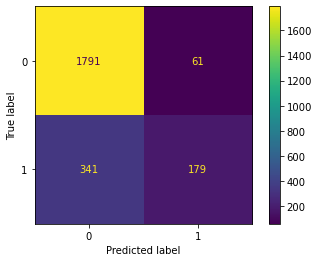

In [231]:
cm = metrics.confusion_matrix(y_train, y_train_pred_based, labels=ac_default.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ac_default.classes_)
disp.plot()
plt.show()

Test :

Plotting confussion pada prediksi data test:

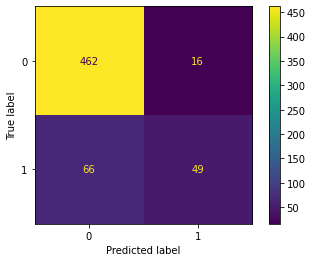

In [232]:
cm = metrics.confusion_matrix(y_test, y_test_pred_based, labels=ac_default.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ac_default.classes_)
disp.plot()
plt.show()

## Based F1 Score GridSearch Model

Melakukan predict pada data train dan juga data test dengan model hyperparameter scoring F1:

In [233]:
y_train_pred_f1= grid_search_adaboost_f1score.best_estimator_.predict(X_train_clean)
y_test_pred_f1 = grid_search_adaboost_f1score.best_estimator_.predict(X_test)

### F1 Score, ROC-AUC, Accuracy,Precision, Recall Metrics:

Train Score:

Menghitung metrics score pada prediksi data train:

In [234]:
print("F1 Score model f1 train: ",metrics.f1_score(y_train,y_train_pred_f1))
print("ROC-AUC Score model f1 train: ",metrics.roc_auc_score(y_train,y_train_pred_f1))
print("Accuracy Score model f1 train: ",metrics.accuracy_score(y_train,y_train_pred_f1))
print("Precision Score model f1 train: ",metrics.precision_score(y_train,y_train_pred_f1))
print("Recall Score model f1 train: ",metrics.recall_score(y_train,y_train_pred_f1))


F1 Score model f1 train:  0.4838292367399741
ROC-AUC Score model f1 train:  0.6619891177936534
Accuracy Score model f1 train:  0.831787521079258
Precision Score model f1 train:  0.7391304347826086
Recall Score model f1 train:  0.3596153846153846


Test Score:

Menghitung metrics score pada prediksi data test:

In [235]:
print("F1 Score model f1 test: ",metrics.f1_score(y_test,y_test_pred_f1))
print("ROC-AUC Score model f1 test: ",metrics.roc_auc_score(y_test,y_test_pred_f1))
print("Accuracy Score model f1 test: ",metrics.accuracy_score(y_test,y_test_pred_f1))
print("Precision Score model f1 test: ",metrics.precision_score(y_test,y_test_pred_f1))
print("Recall Score model f1 test: ",metrics.recall_score(y_test,y_test_pred_f1))

F1 Score model f1 test:  0.5444444444444445
ROC-AUC Score model f1 test:  0.6963070765872293
Accuracy Score model f1 test:  0.8617200674536256
Precision Score model f1 test:  0.7538461538461538
Recall Score model f1 test:  0.4260869565217391


### Confusion Matrix Metrics:

Train:

Plotting confussion pada prediksi data train:

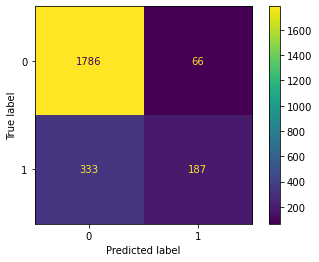

In [236]:
cm = metrics.confusion_matrix(y_train, y_train_pred_f1, labels=grid_search_adaboost_f1score.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_adaboost_f1score.classes_)
disp.plot()
plt.show()

Test:

Plotting confussion pada prediksi data test:

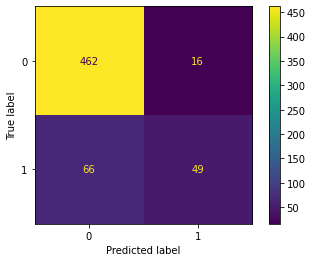

In [237]:
cm = metrics.confusion_matrix(y_test, y_test_pred_f1, labels=grid_search_adaboost_f1score.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_adaboost_f1score.classes_)
disp.plot()
plt.show()

## Evaluation Model Analysis

Berdasarkan pada hasil prediksi dari data train maupun data test pada kedua tipe yaitu hyperparameter default (based model) dan hyperparameter yang dituning:

- Didapat nilai precision yang lebih tinggi dibandingkan recall. Sehingga pada model dengan default hyperparameter ini memiliki kemampuan untuk memprediksi data pada daerah False Negative lebih banyak (negative =0, positive=1). Sehingga pada model ini, walaupun memiliki kemampuan untuk memprediksi class 0 dan class 1, tetapi data lebih banyak terprediksi pada daerah False Negative, dimana pada kasus ini False Negative adalah memprediksi yang seharusnya 1 atau seharusnya telat bayar menjadi 0 atau diprediksi tidak telat bayar pada bulan depan.

- Pada model ini memiliki kekurangan dalam mengklasifikasi data. Karena dalam kasus ini seharusnya model meminimalisir terjadinya False Negative. False Negative ini akan menjadi kerugian sistem karena dimana seharusnya data terlabel diprediksi telat bayar melainkan menjadi tidak telat bayar. Sehingga perusahaan akan melakukan kesalahan dalam perlakuan pada data-data yang terprediksi bahwa seharusnya client tersebut akan telat bayar bulan depannya mendapatkan perlakuan melainkan malah sebaliknya, client terlabel tidak telat bayar sehingga tidak mendapat perlakuan dari perusahaan.

- Pada kedua model ini pada prediksi dengan data train dan test mendapatkan score ROC-AUC yang cukup baik, dimana pada data train, model based mendapat value 0.65 dan model yang dilakukan tuning mendapat value 0.66. Dimana setiap model tersebut memiliki perbedaan value ROC-AUC yang sangat sedikit, yaitu hanya 0.01. 
- Dari kedua model saat prediksi dengan data test didapat nilai score metrics yang sama persis antar kedua model tersebut. Selain itu score test yang didapat lebih tinggi jika dibandingkan dengan score train. Namun perbedaan itu tidaklah tinggi. Sehingga model ini dapat dikatakan goodfit walaupun sedikit mengarah ke overfit terhadap test.

- Berdasarkan pada confusion matrix dari kedua model didapat behavior persebaran data terprediksi yang kurang lebih mirip dimana, model dapat memprediksi kedua class, tetapi karena nilai recall yang sangat kecil mengakibatkan terdapat data yang terprediksi di kategori False Negative. Dimana seharusnya pada model ini dengan kasus ini lebih baik banyak di false positive dibandingkan false negative. Sehingga seharusnya nilai recall yang lebih besar dibandingkan precision.

- Namun pada model ini lebih baik lagi jika model memiliki precision dan recall yang tinggi sehingga didapat F1 score yang tinggi karena precision dan recall yang seimbang dan memberikan kemampuan model dengan jelas mengklasifikasi class 0 dan class 1.

# Model Inference

## Data Inference

Load data inference:

In [238]:
data_inference = pd.read_csv('data_inference.csv')

In [239]:
data_inference

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000,1,1,2,24,0,0,0,0,0,...,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000
1,50000,1,2,2,24,2,3,4,0,5,...,8473,9769,10057,10346,1300,1500,1600,600,600,700


Pada Data inference ini Saya mencoba dua data dimana pada data 1 adalah tipe client yang selalu membayar tepat waktu dan data 2 adalah tipe client yang secara history selalu telat dalam membayar.

Deimana kedua client ini memiliki limit balance yang sama dan umur yang sama.

## Predict

Predict menggunakan model based :

In [240]:
print(ac_default.predict(data_inference))

[0 1]


Predict menggunakan model hyperparameter tuning :

In [241]:
print(grid_search_adaboost_f1score.best_estimator_.predict(data_inference))

[0 1]


Terlihat berhasalkan prediksi pada data inference bahwa:
- Pada client 1 termasuk diprediksi akan tidak telat bayar bulan depan. Hal ini mungkin saja benar karena berdasarkan dari history client 1 dimana selalu membayar credit tepat waktu.

- Pada client 2 termasuk diprediksi akan telat bayar pada bulan depan hal ini mungkin saja benar karena berdasarkan pada history client 2 bahwa client 2 sering telat dalam emlakukan pembayaran credit sehingga model memprediksi bahwa client 2 akan telat membayar pada bulan depan.

# Conclusion

EDA :
- Pada target pada label default payment next month, bahwa pada data yang terlabel akan telat melakukan pembayaran bulan depan (1 / Yes) lebih sedikit dibandingkan dengan yang tidak telat bayar bulan depan (0 / No). Sehingga data target disini cukup tidak balance.
- Distribusi limit balance pada data credit ini bertipe distribusi positive skew karena terdapat banyak limit balance yang tinggi namun frekuensinya kecil. Selain itu mayoritas limit balance client berada pada di bawah 100000.
- Pada data ini distribusi umur bertipe distribusi positive skew, dimana mayoritas client berada pada rentan umur 25 hingga 35 tahun.
- Pada distribusi level educationnya mayoritas client berada apda education level 2, yaitu tingkat pendidikan university.
- Berdasarkan count plot pada repayment status pada bulan April 2005 hingga bulan September 2005 memiliki tipe atau persebaran yang sama pada tiap tahunnya. Dimana client yang default payment nya 0 atau akan membayar tepat waktu secara history repayment status jarang atau sedikit yang telat melakukan pembayaran. Sedangkan client yang default payment nya 1 atau diprediksi telat bayar secara history repayment statusnya paling banyak melakukan telat pembayaran.
- Selain itu mayoritas client yang berkategori default payment 0 atau tidak telat bayar berada pada repayment status 0, dimana mereka selalu tepat dalam membayar credit walaupun terdapat sedikit yang telat bayar walaupun hanya 1 bulan. Selain itu juga ada beberapa yang bayar secukupnya.
- Berdasarkan marital statusnya, mayoritas client berstatus single atau belum menikah dan berdasarkan gendernya, client female (2) lebih banyak dibandingkan client male (1).
- Berdasarkan hubungan antara repayment status dan bill amount pada setiap bulannya, dilihat bahwa client yang berkategori yes pada default payment atau telat bayar dengan warna orange (1) ini paling banyak tersebar pada repayment status diatas angka 0 semua. Sehingga terliaht bahwa pada client yang berkategori telat melakukan pembayaran bulan depan ini paling banyak repayment status berada pada di atas angka 2. Sehingga ini menandakan bahwa client-client ini memang secara history sering melakukan telat pembayaran.
- Berdasarkan pada persebaran data antar jumlah bill dengan jumlah yang dibayar pada setiap clientnya, bahwa rata-rata client melakukan pembayaran di bawah 25.000. Selain itu juga terlihat, client berkategori 1 pada default payment mayoritas atau hampir semuanya melakukan pembayaran setiap bulannya di bawah 25000.
- Jika dilihat berdasarkan correlation feature terhadap target, feature pay_0 hingga pay_6 lah yang memiliki correlation yang tinggi, lalu diikuti oleh education level, selanjutnya age. Selain itu limit balance memiliki correlation negative dengan target dimana ini menandakan bahwa correlationnya berbanding terbalik.
- Jika dilihat antar feature dapat dilihat bahwa pada column pay_0 hingga pay_6 antar feature satu sama lainnya memiliki correlation yang tinggi. Sehingga disini dapat menyebabkan redundant features karena sebenarnya sudah dapat terwakilkan dengan salah satu features saja.
- Selain itu, hal ini juga terjadi pada bill_amt_1 hingga bill_amt_6 dimana masing-masing satu sama lainnya memiliki correaltion yang tinggi.
- pada pay_amt_1 dan pay_amt_2 juga memiliki correlation yang cukup tinggi.

Model Definition and Selection:
- Pada kasus ini akan membuat model untuk mengklasifikasikan data client default_payment_next_month apakah client akan telat membayar bulan depan atau tidak.

- Sehingga pada kasus ini akan menggunakan model classifier, seperti Logistic Regression, Suport Vector Machine (Classifier), Decision Tree, Random Forest, KNN, Gaussian Naive Bayes, dan AdaBoost Classifier.

- Pertama-tama akan dilakukan pencarian model terbaik dengan menggunakan Cross Validation. Dimana metode ini digunakan untuk mengevaluasi tiap model dengan sekian fold lalu dilihat rata-rata dan standar deviasi score yang didapat. Lalu score tersebut akan dibandingkan antar model dan dicari model dengan score terbaik. Model ini dibandingkan dengan parameter default.

- Seteleah itu pada model parameter terbaik akan dilakukan hyperparameter tuning dimana akan mencari hyperparameter terbaik dan tepat untuk model. Hyperparameter tuning dilakukan dengan menggunakan GridSearchCV.

- Setelah itu model dengan parameter terbaik akan dilakukan training dan prediksi. Setelah itu akan dilakukan evaluasi model. Dimana untuk classification, metric yang digunakan adalah f1 score, precision, recall, roc-auc. Dimana accuracy pada evaluasi model tidak digunakan karena pada kasus ini data yang dimiliki memiliki data target yang tidak balance. Selain itu metric Confusion Matrix akan digunakan untuk melihat visualisasi dari hasil precision dan recall.

- Berdasarkan hasil cross validation didapat model Adaboost clasifier dengan score:
    - accurracy score yang akan didapat diantara  0.816 hingga 0.840
    - f1 score yang akan didapat diantara 0.406 hingga 0.516
    - roc_auc score yang akan didapat diantara 0.704 hingga 0.780
    
- Setelah dilakukan GridSearchCV, model yang dipilih adalah AdaBoost Classifier dengan hyperparameter terbaik learning rate 1.5 dan n_estimators 75.

Model Evaluation :

Berdasarkan pada hasil prediksi dari data train maupun data test pada kedua tipe yaitu hyperparameter default (based model) dan hyperparameter yang dituning:

- Didapat nilai precision yang lebih tinggi dibandingkan recall. Sehingga pada model dengan default hyperparameter ini memiliki kemampuan untuk memprediksi data pada daerah False Negative lebih banyak (negative =0, positive=1). Sehingga pada model ini, walaupun memiliki kemampuan untuk memprediksi class 0 dan class 1, tetapi data lebih banyak terprediksi pada daerah False Negative, dimana pada kasus ini False Negative adalah memprediksi yang seharusnya 1 atau seharusnya telat bayar menjadi 0 atau diprediksi tidak telat bayar pada bulan depan.

- Pada model ini memiliki kekurangan dalam mengklasifikasi data. Karena dalam kasus ini seharusnya model meminimalisir terjadinya False Negative. False Negative ini akan menjadi kerugian sistem karena dimana seharusnya data terlabel diprediksi telat bayar melainkan menjadi tidak telat bayar. Sehingga perusahaan akan melakukan kesalahan dalam perlakuan pada data-data yang terprediksi bahwa seharusnya client tersebut akan telat bayar bulan depannya mendapatkan perlakuan melainkan malah sebaliknya, client terlabel tidak telat bayar sehingga tidak mendapat perlakuan dari perusahaan.

- Pada kedua model ini pada prediksi dengan data train dan test mendapatkan score ROC-AUC yang cukup baik, dimana pada data train, model based mendapat value 0.65 dan model yang dilakukan tuning mendapat value 0.66. Dimana setiap model tersebut memiliki perbedaan value ROC-AUC yang sangat sedikit, yaitu hanya 0.01. 
- Dari kedua model saat prediksi dengan data test didapat nilai score metrics yang sama persis antar kedua model tersebut. Selain itu score test yang didapat lebih tinggi jika dibandingkan dengan score train. Namun perbedaan itu tidaklah tinggi. Sehingga model ini dapat dikatakan goodfit walaupun sedikit mengarah ke overfit terhadap test.

- Berdasarkan pada confusion matrix dari kedua model didapat behavior persebaran data terprediksi yang kurang lebih mirip dimana, model dapat memprediksi kedua class, tetapi karena nilai recall yang sangat kecil mengakibatkan terdapat data yang terprediksi di kategori False Negative. Dimana seharusnya pada model ini dengan kasus ini lebih baik banyak di false positive dibandingkan false negative. Sehingga seharusnya nilai recall yang lebih besar dibandingkan precision.

- Namun pada model ini lebih baik lagi jika model memiliki precision dan recall yang tinggi sehingga didapat F1 score yang tinggi karena precision dan recall yang seimbang dan memberikan kemampuan model dengan jelas mengklasifikasi class 0 dan class 1.


Model Inference :

Model digunakan untuk memprediksi data inference, dimana dari kedua model (based model dan Hypertune Model) didapat hasil prediksi yang sama.

Further Improvement :

- Mencari data lebih banyak lagi agar data target yang dimiliki antar class nya tidak imbalance.
- Mencoba membandingkan model-model algoritma dengan tiap model sudah dilakukan hyperparameter tuning.
- Mencoba model-model algoritma lain yang belum dicoba.
- Mengevaluasi kemabli pada feature selection.

# Conceptual Problems and Answers

- `Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!`


Criterion adalah sebuah fungsi pada hyperparameter Decision Tree. Criterion berfungsi untuk mengukur kualitas dari split pada model decision tree.

Criterion terdapat tiga jenis, yaitu gini, entropy, dan log_loss.

Criterion Entropy pada Decision Tree membantu model untuk menseleksi features untuk splitting, di node dengan mengukur purity dari split. Jika entropy = 0 maka termasuk pure split (dalam artian hanya 1 class), jika entropy = 1 maka termasuk dalam impuresplit (dalam artian 50-50 untuk kedua class).

- `Apakah fungsi dari pruning pada Tree model?`

Pruning adalah sebuah teknik di decision tree dimana melakukan pemotongan atau meremove beberapa part bagian dari decision tree yang tidak diperlukan atau tidak memiliki power. Hal ini dilakukan selain untuk mengurangi ukuran dari decision tree tetapi bertujuan juga untuk mengurangi tingkat kesalaah saat prediksi pada kasus baru (inferensial).

- `Bagaimana cara memilih K yang optimal pada KNN?`

Memilih nilai K yang optimal dapat dilakukan dengan memplotting error rate dengan variasi K. Dimana dilakukan for loop dengan interval K tertentu yangn mau dievaluasi. Lalu di test dan dihitung accuracy nya, lalu menghitung error ratenya. Lalu error rate di plot terhadap nilai K nya. 

Berdasarkan dari plotting tersebut dipilih K dengan error rate terkecil.

Selain itu juga dapat dilakukan plotting accuracy score terhadap nilaik pada training set dan test set. Lalu dicari atau dipilih nilai k dengan margin antar training dan test accuracy yang sedikit.

- `Jelaskan apa yang kalian ketahui tentang Cross Validation!`

Cross validation adalah sebuah metode dalam machine learning pada tahap model selection dimana metode ini mengevaluasi sebuah model dimana model dibagi menjadi beberapa fold dimana lalu dari banyaknya fold tersebut diplihi dua dataa subset, yaitu data train dan data validasi.  Jumlah fold ini dapat ditentukan berdasarkan ukuran data set.

Sehingga setelah itu cross validation akan melakukan komputasi iterasi dimana mengevaluasi model dengan menghasilkan persebaran score model dari berbagai cv k-vold. Setelah itu dengan score tersebut dapat digunakan untuk menghitung margin score suatu model dan memilih model yang lebih baik.

- `Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!`

Accuracy adalah seberapa banyak model mendeteksi dengan benar dari seluruh total data yang diprediksi atau biasa digunakan untuk melihat ketepatan model dalam memprediksi data benar.

Precision adalah sebuah perbandingan antara True Positive (nilai yang benar dan terprediksi positif) dengan banyaknya data yang diprediksi positif. Sehingga ketika nilai false positive semakin kecil maka nilai precision akan semakin mendekati 1 atau semakin tinggi. Sehingga dengan kata lain, model akan semakin bisa mendeteksi True Postivie dan sedikit terjadi False Positive.

Berbeda dengan Precision, Recall adalah perbandingan antara True Negative (nilai yang aktual dan prediksinya negative) dengan banyaknya data yang seharusnya positive. Sehingga ketika nilai False Negative semakin kecil maka recall akan semakin besar. Sehingga dengan kata lain, semakin tinggi nilai recall maka semakin bisa model mendeteksi True Positive. berbandiung terbalik jika nilai recall kecil maka data akan banyak tersebar pada False Negative.

F1 Score adlah harmoinic mean dari precision dan recall. Jika F1 score mendekati 1 atau bernilai 1 maka dapat dikatakan bahwa model memiliki nilai precision dan recall yang bagus. Berbanding terbalik jika F1 Score rendah menandakan nilai precision atau recall ataupun keduanya memiliki score yang rendah.
